In [ ]:
#M #missionaries in left
#C #cannibals in left
# B=1left
# B=0right

def is_valid(state):
    if(state[0]>3 or state[1]>3 or state[2]>1 or state[0]<0 or state[1]<0 or state[2]<0 or (0<state[0]<state[1]) or (0<(3-state[0])<(3-state[1]))):
        return False
    else:
        return True

def generate_next_states(M,C,B):
    moves = [[1, 0, 1], [0, 1, 1], [2, 0, 1], [0, 2, 1], [1, 1, 1]]
    valid_states = []
    for each in moves:
        if(B==1):next_state = [x1 - x2 for (x1, x2) in zip([M, C, B], each)]
        else:next_state = [x1 + x2 for (x1, x2) in zip([M, C, B], each)]
        if (is_valid(next_state)):
            # print(next_state)
            valid_states.append(next_state)
    return valid_states
solutions = []
def find_sol(M,C,B,visited):
    if([M,C,B]==[0,0,0]):#everyne crossed successfully
        # print("Solution reached, steps: ",visited+[[0,0,0]])
        solutions.append(visited+[[0,0,0]])
        return True
    elif([M,C,B] in visited):#prevent looping
        return False
    else:
        visited.append([M,C,B])
        if(B==1):#boat is in left
            for each_s in generate_next_states(M,C,B):
                find_sol(each_s[0],each_s[1],each_s[2],visited[:])
        else:#boat in in right
            for each_s in generate_next_states(M,C,B):
                find_sol(each_s[0],each_s[1],each_s[2],visited[:])


find_sol(3,3,1,[])

solutions.sort()
for each_sol in solutions:
    print(each_sol)

[[3, 3, 1], [2, 2, 0], [3, 2, 1], [3, 0, 0], [3, 1, 1], [1, 1, 0], [2, 2, 1], [0, 2, 0], [0, 3, 1], [0, 1, 0], [0, 2, 1], [0, 0, 0]]
[[3, 3, 1], [2, 2, 0], [3, 2, 1], [3, 0, 0], [3, 1, 1], [1, 1, 0], [2, 2, 1], [0, 2, 0], [0, 3, 1], [0, 1, 0], [1, 1, 1], [0, 0, 0]]
[[3, 3, 1], [3, 1, 0], [3, 2, 1], [3, 0, 0], [3, 1, 1], [1, 1, 0], [2, 2, 1], [0, 2, 0], [0, 3, 1], [0, 1, 0], [0, 2, 1], [0, 0, 0]]
[[3, 3, 1], [3, 1, 0], [3, 2, 1], [3, 0, 0], [3, 1, 1], [1, 1, 0], [2, 2, 1], [0, 2, 0], [0, 3, 1], [0, 1, 0], [1, 1, 1], [0, 0, 0]]


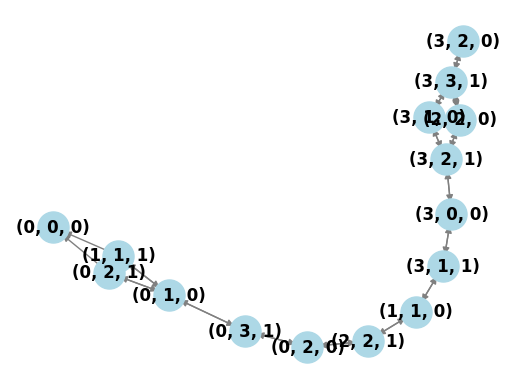

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# M = missionaries in left
# C = cannibals in left
# B = 1 for boat on the left, 0 for boat on the right
# B = 1 left, B = 0 right
def is_valid(state):
    if(state[0] > 3 or state[1] > 3 or state[2] > 1 or state[0] < 0 or state[1] < 0 or state[2] < 0 or (0 < state[0] < state[1]) or (0 < (3 - state[0]) < (3 - state[1]))):
        return False
    else:
        return True

def generate_next_states(M, C, B):
    moves = [[1, 0, 1], [0, 1, 1], [2, 0, 1], [0, 2, 1], [1, 1, 1]]
    valid_states = []
    for each in moves:
        if(B == 1):
            next_state = [x1 - x2 for (x1, x2) in zip([M, C, B], each)]
        else:
            next_state = [x1 + x2 for (x1, x2) in zip([M, C, B], each)]
        if (is_valid(next_state)):
            valid_states.append(next_state)
    return valid_states

solutions = []
def find_sol(M, C, B, visited, G):
    if([M, C, B] == [0, 0, 0]):
        solutions.append(visited + [[0, 0, 0]])
        return True
    elif([M, C, B] in visited):
        return False
    else:
        visited.append([M, C, B])
        if(B == 1):
            for each_s in generate_next_states(M, C, B):
                G.add_edge(tuple([M, C, B]), tuple(each_s))
                find_sol(each_s[0], each_s[1], each_s[2], visited[:], G)
        else:
            for each_s in generate_next_states(M, C, B):
                G.add_edge(tuple([M, C, B]), tuple(each_s))
                find_sol(each_s[0], each_s[1], each_s[2], visited[:], G)

# Initialize graph
G = nx.DiGraph()

# Start from the initial state (3, 3, 1)
find_sol(3, 3, 1, [], G)

# Sort solutions
solutions.sort()

# Visualize graph
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
nx.draw_networkx_edges(G, pos, width=1, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.axis('off')
plt.show()


This code is a solution to the classic Missionaries and Cannibals problem, where 3 missionaries and 3 cannibals must cross a river with a boat that can only carry two people at a time. The boat can only be manned by the missionaries or the cannibals, and the missionaries cannot be outnumbered by the cannibals on either side of the river.

The code uses a depth-first search (DFS) algorithm to generate all possible combinations of people in the boat, starting with the initial state of 3 missionaries and 3 cannibals on one side of the river, and the boat on the other side.

The "is_valid" function checks if the state (i.e., the combination of missionaries, cannibals, and the location of the boat) is valid or not. A state is considered valid if there are no more than 3 missionaries or cannibals on either side of the river, and if the number of missionaries does not become less than the number of cannibals on either side.

The "generate_next_states" function takes in the current state and returns a list of all the valid next states that can be reached from the current state.

The "find_sol" function is the main function that uses DFS to generate all possible combinations. It starts with the initial state and recursively calls itself to find all possible combinations of people in the boat. If a combination results in all the missionaries and cannibals on the other side of the river, the solution is considered found, and the steps to reach that solution are stored in the "solutions" list. The function also keeps track of all the visited states in the "visited" list to prevent looping.

Finally, the solutions are sorted, and the steps to reach each solution are printed.